# Laon prediction Dataset

## Problem Statement
Predict the potential loan defaulters using the machine Learning model.

The major aim of this notebook is to predict which of the customers will have their loan approved. I am going to used ```XGBoost model``` for the predicion.

Make sure you have installed xgbost by-``` pip install xgboost ``` in command line promt or in anconda prompt

### Libraries 📕📗📘

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#relevant ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,plot_confusion_matrix, plot_precision_recall_curve

#ML models
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Preprocessing and Data Analysis 
First look at the data:

In [2]:
# read in csv file as a DataFrame
df = pd.read_csv('Loan Prediction_Training Data.csv')
# explore the first 5 rows
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
# Setting Id as index 
df.set_index('Id', inplace=True)
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [4]:
# Lets look at the shape of data
df.shape

(252000, 12)

We total 252000 rows and 12 columns in the datset, our Target feature is 'Risk_Flag'

In [5]:
# lets see the features information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


These features are object data type, we need to make it numeric to understand by machine. We will do feature Engineering later 

### Categorical columns are:
- Married/Single, 
- House_Ownership,
- Car_Ownership ,
- Profession, 
- CITY, 
- STATE          
            

      
          

In [6]:
# summary of data
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [7]:
# checking missing values
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Okay, we do not have any missing values here

## Data visalization 📊

Firstly we need to split our data to categorical and numerical data

In [8]:
# Lets look at the columns name
df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [9]:
# Categorical features:
cat_cols= df[['Married/Single', 'House_Ownership','Car_Ownership' ,'Profession', 'CITY', 'STATE']]

# numericasl features
num_cols= df[['Income', 'Experience','Age','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS']]

### Univariate analysis:
- Here we will visualize the data of only one features, and try to understand the pattern of data 


We'll start with an independent variable that also happens to be our target variable. We'll use a bar chart to analyse this category variable, as illustrated below. The bar chart illustrates that out of 252000 persons, 30996 (about 0.123 percent) were authorised for a loan.

Text(0.5, 1.0, 'Count of Risk_flag')

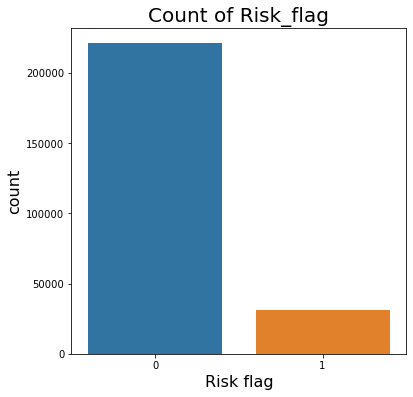

In [10]:
# lets visualize the Target variables first,
plt.figure(figsize=(6,6))
sns.countplot(df['Risk_Flag'])
plt.xlabel('Risk flag',fontsize=16)
plt.ylabel('count',fontsize=16)
plt.title("Count of Risk_flag", fontsize=20)


By looking at the plot we could say that no. of risk flages are preety much higher than approved laon. It seems like our dataset is Imbalance, Lets look at the counts below, we will count ```value_counts()```.

In [11]:
df['Risk_Flag'].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

### Analysis of Numerical varaibles 

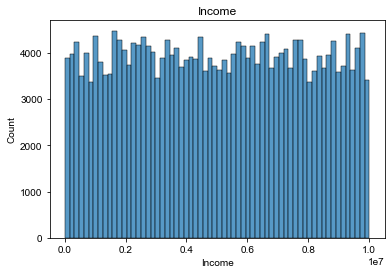

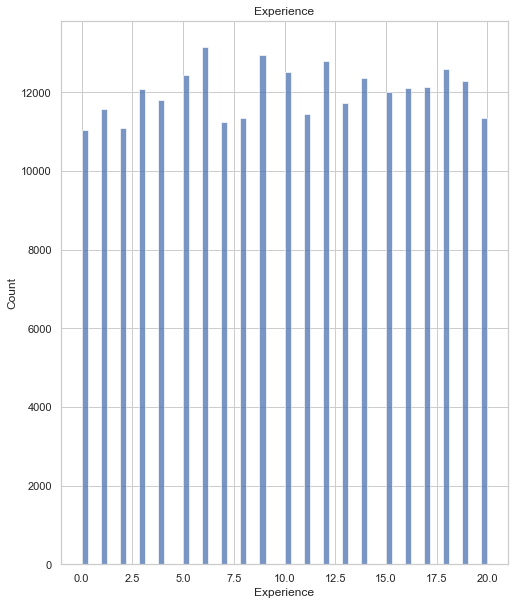

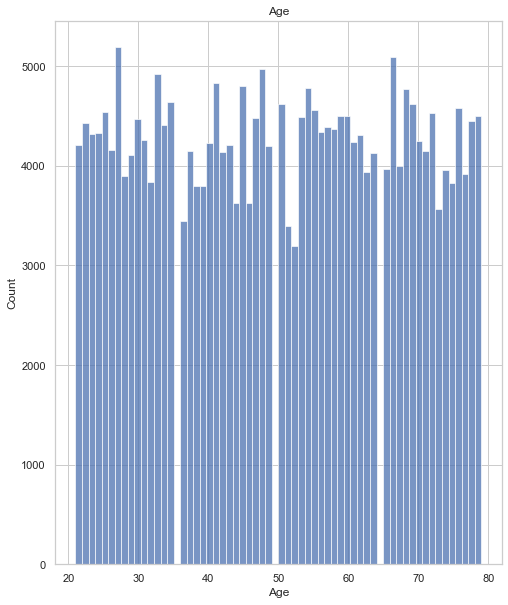

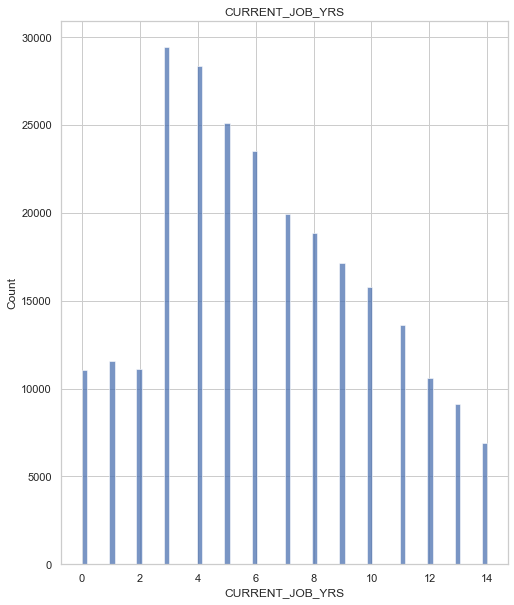

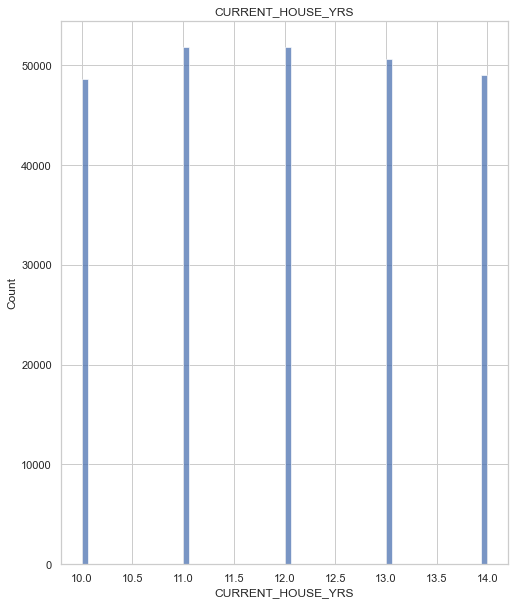

<Figure size 576x720 with 0 Axes>

In [12]:
#Let's plot our Numeric data:
for i in num_cols:
    sns.histplot(num_cols[i])
    plt.title(i)
    plt.figure(figsize=(8,10))
    sns.set(style="whitegrid")

### Analysis of categorical variables

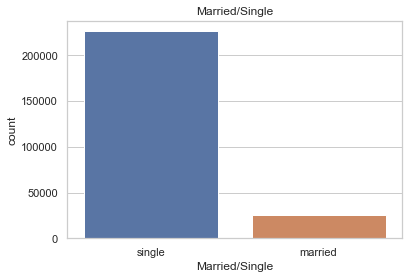

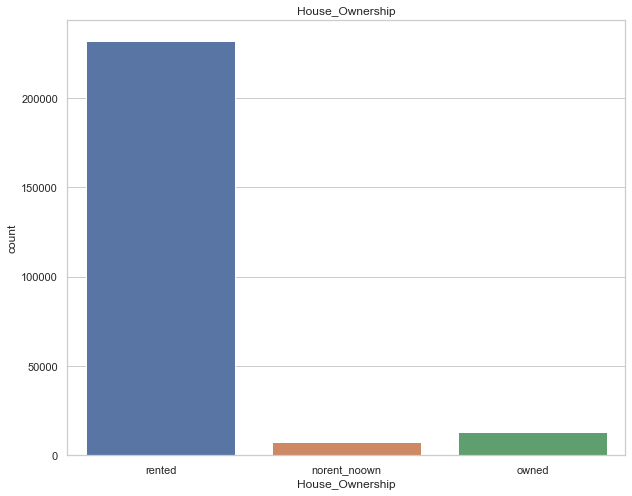

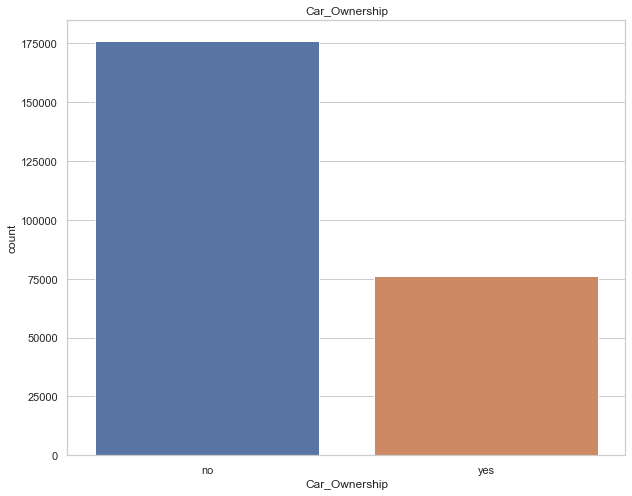

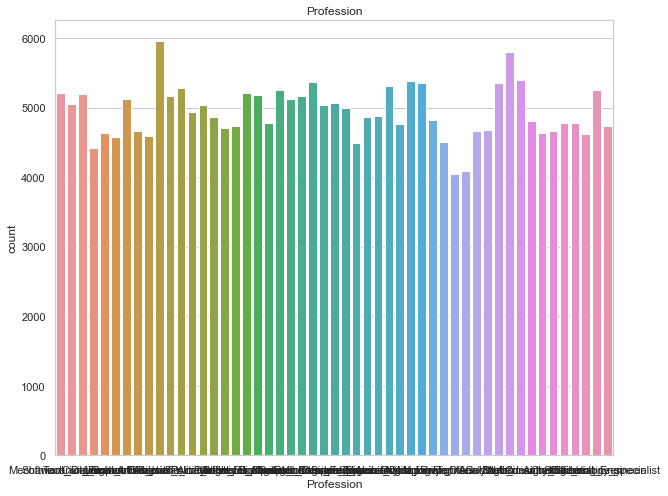

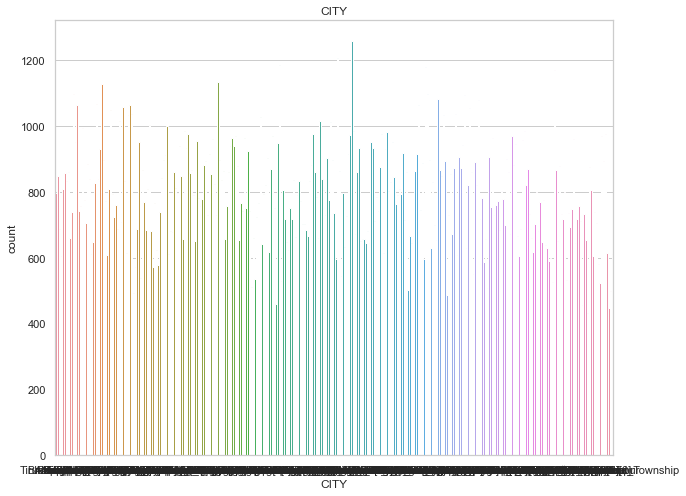

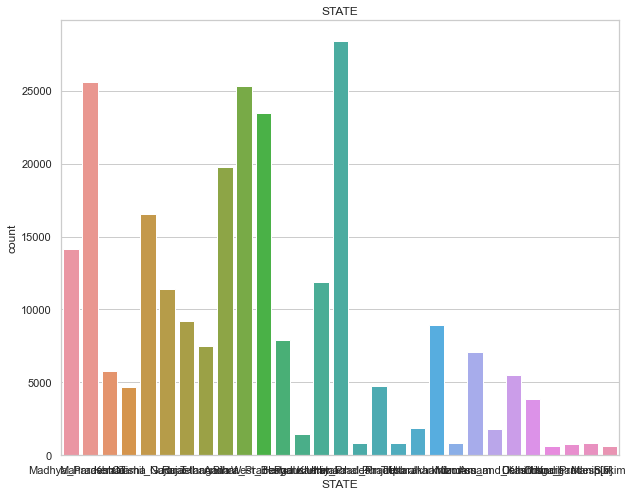

<Figure size 720x576 with 0 Axes>

In [19]:
#Let's plot our categorical data:
for i in cat_cols:
    sns.countplot(cat_cols[i])
    plt.title(i)
    sns.set(style="whitegrid")
    plt.figure(figsize=(10,8))

It can be conclude from the below bar plots that in our observed data:

- 90% of loan applicants are single in the training dataset.
- Nearly 90% are who rented a house 
- About 75%- 80% have No car ownership 


### Bivariate Analysis
Bivariate analysis is finding some kind of empirical relationship between two variables. Specifically the dependent vs independent Variables

### Categorical Independent Vs Target

Text(0, 0.5, 'count')

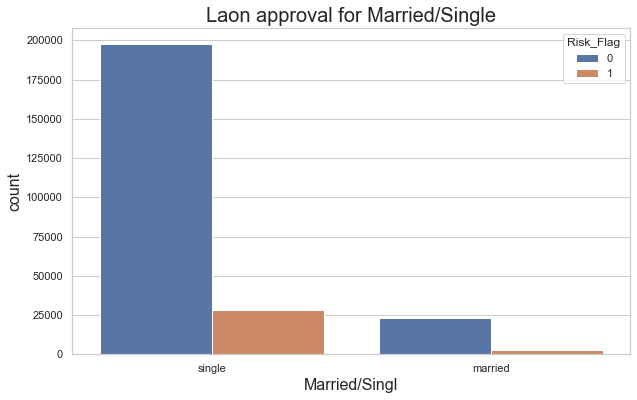

In [23]:
# Single/Married vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot('Married/Single',hue='Risk_Flag',data=df)
plt.title('Laon approval for Married/Single', fontsize=20)
plt.xlabel('Married/Singl',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

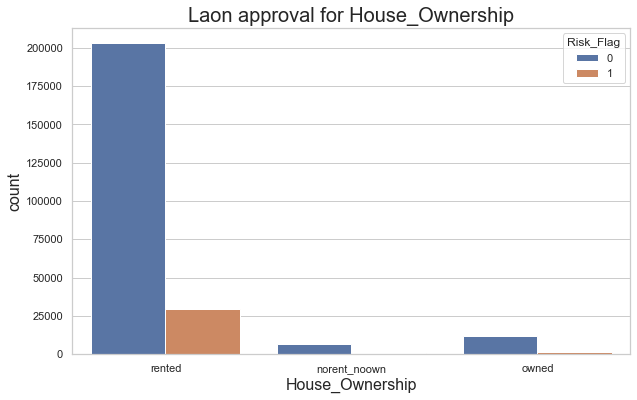

In [24]:
# House_Ownership vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot('House_Ownership',hue='Risk_Flag',data=df)
plt.title('Laon approval for House_Ownership', fontsize=20)
plt.xlabel('House_Ownership',fontsize=16)
plt.ylabel("count",fontsize=16)

<AxesSubplot:xlabel='Age', ylabel='Income'>

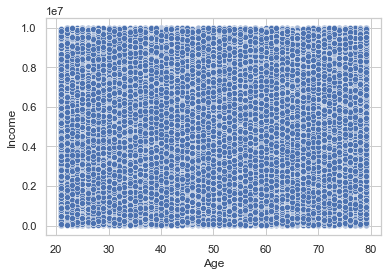

In [47]:
# Lets compare income and age 
sns.scatterplot(y='Income',x='Age',data=df )

Text(0, 0.5, 'count')

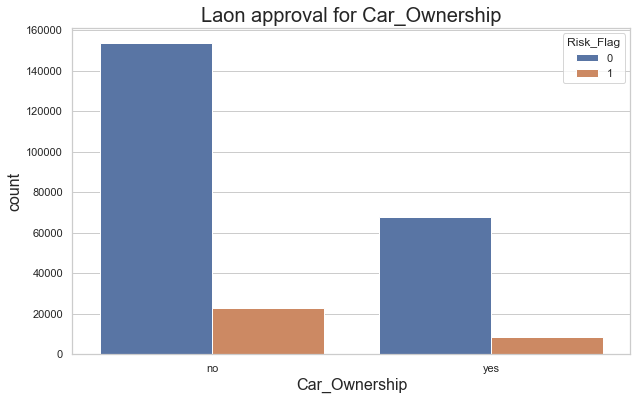

In [25]:
# Car_Ownership vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot('Car_Ownership',hue='Risk_Flag',data=df)
plt.title('Laon approval for Car_Ownership', fontsize=20)
plt.xlabel('Car_Ownership',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

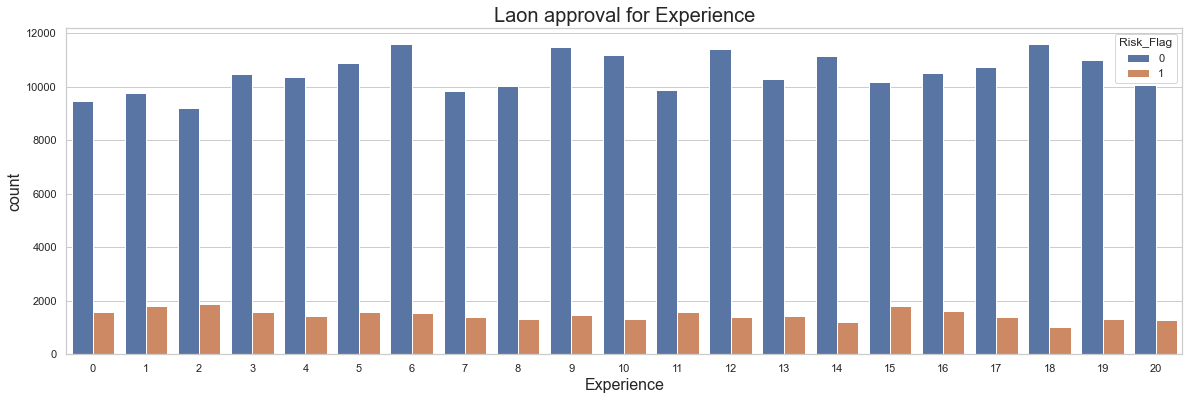

In [26]:
# Experience vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.countplot('Experience',hue='Risk_Flag',data=df)
plt.title('Laon approval for Experience', fontsize=20)
plt.xlabel('Experience',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

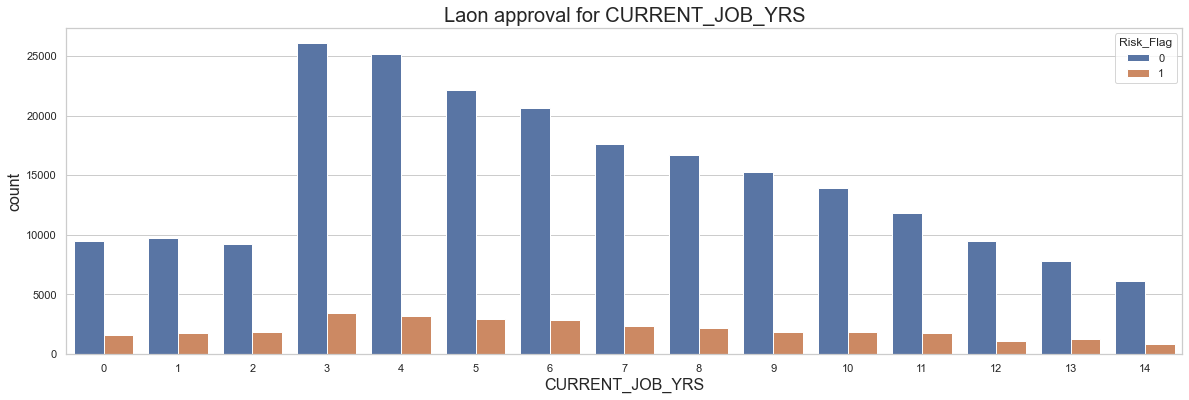

In [27]:
# CURRENT_JOB_YRS vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.countplot('CURRENT_JOB_YRS',hue='Risk_Flag',data=df)
plt.title('Laon approval for CURRENT_JOB_YRS', fontsize=20)
plt.xlabel('CURRENT_JOB_YRS',fontsize=16)
plt.ylabel("count",fontsize=16)

Text(0, 0.5, 'count')

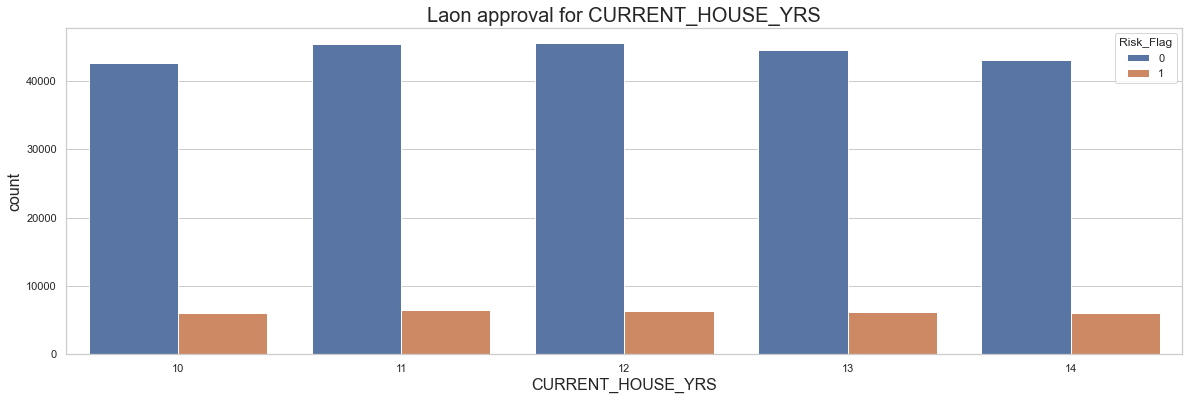

In [28]:
# CURRENT_HOUSE_YRS vs Risk_Flag
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.countplot('CURRENT_HOUSE_YRS',hue='Risk_Flag',data=df)
plt.title('Laon approval for CURRENT_HOUSE_YRS', fontsize=20)
plt.xlabel('CURRENT_HOUSE_YRS',fontsize=16)
plt.ylabel("count",fontsize=16)

In [48]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


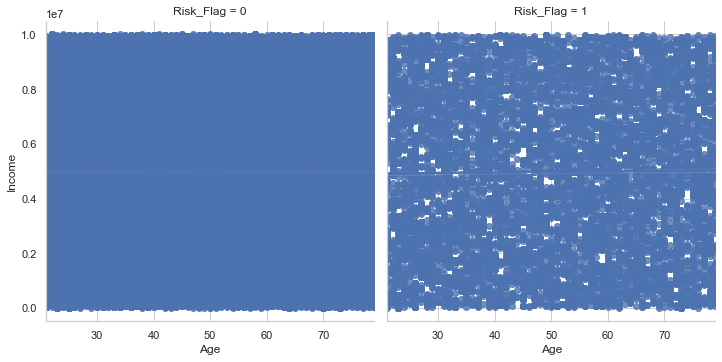

In [29]:
#Income vs Age 
sns.lmplot(y='Income',x='Age',col='Risk_Flag',data=df )

<AxesSubplot:xlabel='Experience', ylabel='Income'>

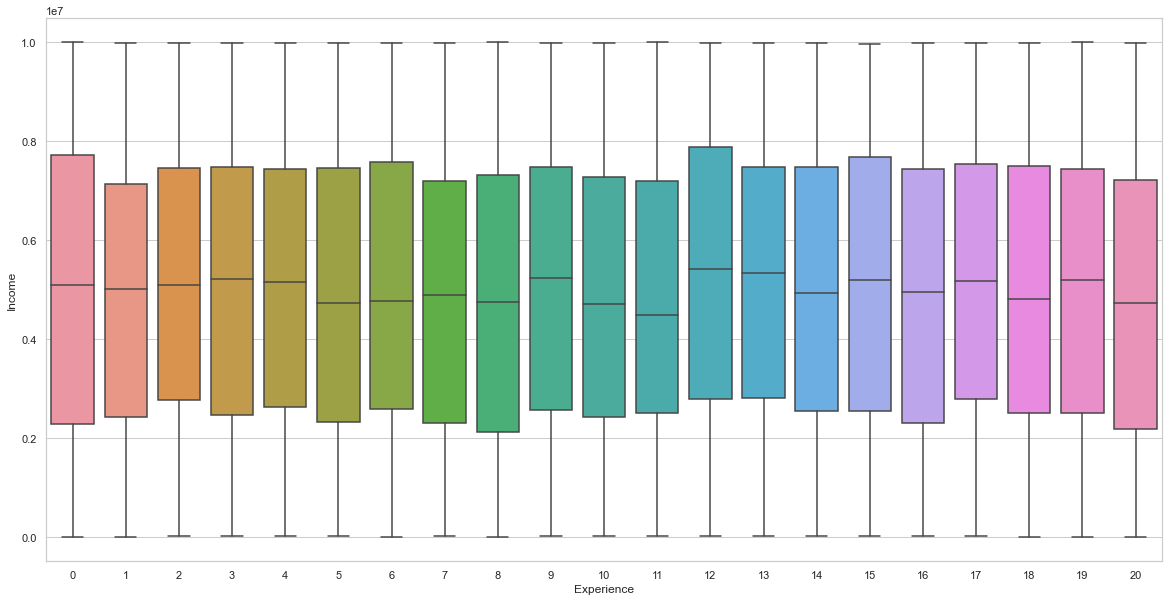

In [31]:
#Income vs Age 

plt.figure(figsize=(20,10))
sns.boxplot(y='Income',x='Experience',data=df )

### Visualizing correlation via Heatmap


In [32]:
# Lets see the corelartion between all te numerical variables 
df.corr()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


<AxesSubplot:>

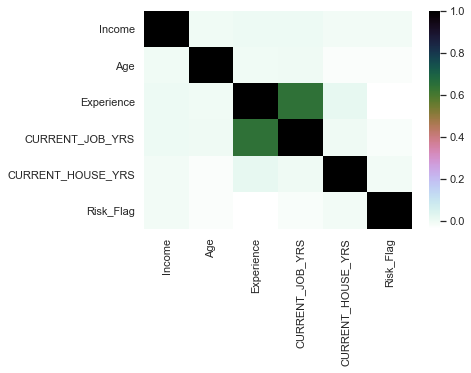

In [33]:
#plotting the correlation matrix
sns.heatmap(df.corr(),cmap='cubehelix_r')

We can clearly see that ```CURRENT_JOB_YRS``` has correlated with with ```Experience``` (a positive correlation of 0.60). Since we are not using statistical model, we do not have to check for multicollinarity.

If We are using statistical model like ```Logitic regression ```, we need to remove independent features which is highly correlated to each other.

### Independnet and Dependent variables 
First, we'll partition our data into two variables: ``X``, which represents the attributes we described before, and ``y``, which represents the ``Risk_Flag`` , which is the target value we want to predict.

In [35]:
# Independet variables 
X= df.iloc[:,:-1]

# Dependent variables 
y= df.iloc[:,-1]

In [36]:
# Let's check the first 5 rows of independent varibales 
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


### Droping The features

We know that the columns City and State which is not future help in prediction of model, we would remove these two features from Independent variables by using ``drop``.

In [37]:
# Dropping columns city and state from independet variables 
X.drop(['CITY','STATE'],inplace=True,axis=1)

In [96]:
# Now lets verify it by using head 
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
Id,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,3,13
2,7574516,40,10,single,rented,no,Software_Developer,9,13
3,3991815,66,4,married,rented,no,Technical_writer,4,10
4,6256451,41,2,single,rented,yes,Software_Developer,2,12
5,5768871,47,11,single,rented,no,Civil_servant,3,14


### Feature Enineering
We know machine learning model does'nt understand the text, we need to convert columns to numeric by using pandas ``get_dummies()``

- ``One_hot_encoding`` will do for the nominal data:We cannot Rank the data, Example like zip-code
- ``Lavel_encoding`` we do for ordinal data : we can give a rank , example like Grade, education status

We doing here ``One_hot_encodin``g Because machine learning algorithm understand only numerical data, and we have some of predictor are categorical type data we will use ``get_dummies()``


In [38]:
# COnverting to dummies variables 
X= pd.get_dummies(X, columns=['Married/Single','House_Ownership','Car_Ownership','Profession'],drop_first=True)

In [39]:
# Now lets verfy it.
X.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
Id,,,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,3,13,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7574516,40,10,9,13,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3991815,66,4,4,10,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,6256451,41,2,2,12,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5,5768871,47,11,3,14,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split
We will split the data into trainning and tesing set, here we are sing 30% data for Testing

In [40]:
# Splitting the training and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

### Building a XGBoost model
The XGBoost Advantage

I’ve always admired the boosting capabilities that this algorithm infuses in a predictive model. When I explored more about its performance and science behind its high accuracy, I discovered many advantages:

#### Regularization:
- Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
- In fact, XGBoost is also known as a ‘regularized boosting‘ technique.

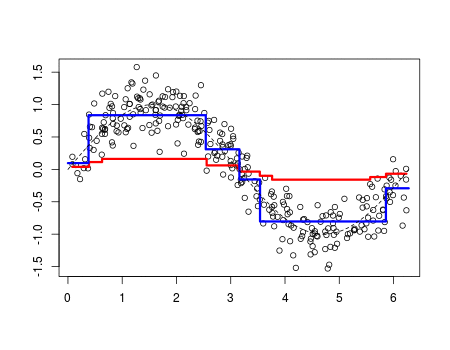

In [41]:
# Training the model

XGB = XGBClassifier(use_label_encoder=False)
XGB.fit(X_train, y_train)

# Predicting the model
y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

[13:40:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     66329
           1       0.65      0.14      0.23      9271

    accuracy                           0.89     75600
   macro avg       0.77      0.56      0.58     75600
weighted avg       0.86      0.89      0.85     75600

88.54% Accurate


T**he accuracy of model is quite good, but it is not performing well with the person who approved the loan(1). This is beacuse our datset was completly imbalance**. Here we will do try to do hyperparameter tuning.

In [42]:
# Confusion matrix
print(confusion_matrix(y_test,y_predict))

[[65637   692]
 [ 7970  1301]]


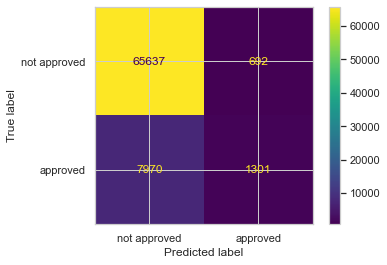

In [43]:
# Plotting the confusion matrics
plot_confusion_matrix(XGB,X_test,y_test,values_format='d',display_labels=['not approved','approved'])

**Peopele who did not approved loan (99%) correctly classified. but not model not performing well with people who had approved the loan, only(14%) corrrectly classified. XGBoost has a parameter that ``scale_pos_weight`` that helps with imbalanced data. we try to improve the accuracy by using cross validation.**

**Now we will evaluate the model, since this dataset is completley imbalanced so we will get accuracy by ``roc_auc_score``.**

In [44]:
from sklearn.metrics import roc_auc_score
print('The accuracy of model is:', roc_auc_score(y_test,y_predict))

The accuracy of model is: 0.5649486095677779


## XGBoost Parameters

##### max_depth [default=6]
- The maximum depth of a tree, same as GBM.
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using CV.
- Typical values: 3-10

##### max_leaf_nodes
- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
- If this is defined, GBM will ignore max_depth.

#### gamma [default=0]
- A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
- Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.

#### max_delta_step [default=0]
- In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
- Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
- This is generally not used but you can explore further if you wish.

#### subsample [default=1]
- Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
- Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
- Typical values: 0.5-1

#### colsample_bytree [default=1]
- Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
- Typical values: 0.5-1

#### colsample_bylevel [default=1]
- Denotes the subsample ratio of columns for each split, in each level.
- I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.

#### lambda [default=1]
- L2 regularization term on weights (analogous to Ridge regression)
- This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.

#### alpha [default=0]
- L1 regularization term on weight (analogous to Lasso regression)
- Can be used in case of very high dimensionality so that the algorithm runs faster when implemented

#### scale_pos_weight [default=1]
- A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.

Since our data is too large, if we do GridsearchCv, it will take time. If you want to try with hyperparameter tunning you could try it. Here i am using only  ``scale_pos_weight`` to make data balance 

In [55]:
# find the value of ``scale_pos_weight``
scale_pos_weight=len(y[y==0])/len(y[y==1])
scale_pos_weight

7.130081300813008

### Building the XGBoost model with scale_pos_weight. 

In [56]:

XGB = XGBClassifier(use_label_encoder=False,scale_pos_weight=7)

# Fitting the model
XGB.fit(X_train, y_train)

# Predicting the model
y_predict = XGB.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")

[14:40:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     66329
           1       0.40      0.80      0.54      9271

    accuracy                           0.83     75600
   macro avg       0.68      0.82      0.72     75600
weighted avg       0.90      0.83      0.85     75600

82.96% Accurate


In [57]:
# Priting the confusion matrix
print(confusion_matrix(y_test,y_predict))

[[55306 11023]
 [ 1858  7413]]


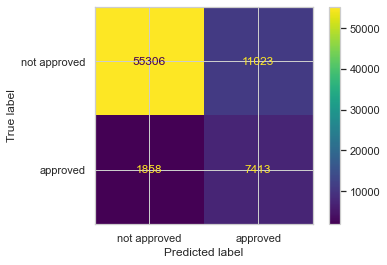

In [58]:
# Plotting the confusion matrics
plot_confusion_matrix(XGB,X_test,y_test,values_format='d',display_labels=['not approved','approved'])

**Peopele who did not approved loan (83%) correctly classified. And also our model is performing well with people who had approved the loan,(80%) corrrectly classified.** 

In [59]:
loan_approved=1834+7437
loan_approved_per= 7437/loan_approved
loan_approved_per

0.8021788372343868

In [60]:
# Roc_auc score 
print('The accuracy of model is:', roc_auc_score(y_test,y_predict))

The accuracy of model is: 0.8167016919556359


**The accuracy of model is improved significantly from 56 % to 81%, since our dataset is Imbalance we have to check accuracy by using roc_auc_score**

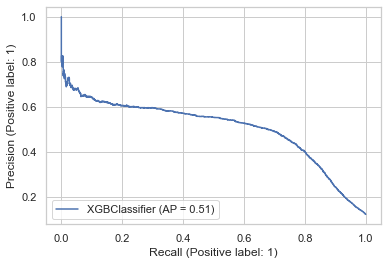

In [61]:
plot_precision_recall_curve(XGB,X_test,y_test)

## Conclusion
- We performed exploratory data analysis on the dataset's features to see how they are distributed.
- We used charts to do bivariate and multivariate analysis to examine how they impacted each other's properties.
- Our dataset was Imbalanced we used XGBoost parameter ``scale_pos_weight`` to make data balanced.
- We improved accuracy by using ``scale_pos_weight`` from 56% to 81%, since the data was imbalanced we used ``roc_auc_score`` for the accuracy.
- The final model accuracy is around 82%. 